In [1]:
import pandas as pd
trainingdataset = pd.read_csv("/home/iamsk/LHS 712 Final Project/TaskA-TrainingSet.csv")
validationdataset = pd.read_csv("/home/iamsk/LHS 712 Final Project/TaskA-ValidationSet.csv")

In [2]:
trainingdataset['dialogue'] = trainingdataset['dialogue'].str.replace('Doctor:', ' ')
trainingdataset['dialogue'] = trainingdataset['dialogue'].str.replace('Patient:', ' ')
trainingdataset['dialogue'] = trainingdataset['dialogue'].str.replace('Guest_family:', ' ')
trainingdataset['dialogue'] = trainingdataset['dialogue'].str.replace('Guest_clinician:', ' ')
trainingdataset['dialogue'] = trainingdataset['dialogue'].str.replace(':', ' ')
trainingdataset['dialogue'] = trainingdataset['dialogue'].str.replace('\r\n', ' ')

# Doing the same for validation dataset
validationdataset['dialogue'] = validationdataset['dialogue'].str.replace('Doctor:', ' ')
validationdataset['dialogue'] = validationdataset['dialogue'].str.replace('Patient:', ' ')
validationdataset['dialogue'] = validationdataset['dialogue'].str.replace('Guest_family:', ' ')
validationdataset['dialogue'] = validationdataset['dialogue'].str.replace('Guest_clinician:', ' ')
validationdataset['dialogue'] = validationdataset['dialogue'].str.replace(':', ' ')
validationdataset['dialogue'] = validationdataset['dialogue'].str.replace('\r\n', ' ')

In [3]:
# !pip install nltk

In [4]:
import nltk
from nltk.corpus import stopwords
import pandas as pd

# Download the NLTK stopwords corpus
nltk.download('stopwords')

# Load the stop words
stop_words = set(stopwords.words('english'))

# Remove stop words from a column
trainingdataset['dialogue'] = trainingdataset['dialogue'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
validationdataset['dialogue'] = validationdataset['dialogue'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

[nltk_data] Downloading package stopwords to /home/iamsk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
num_classes = len(trainingdataset['section_header'].value_counts())
num_classes

20

In [6]:
# !pip install matplotlib

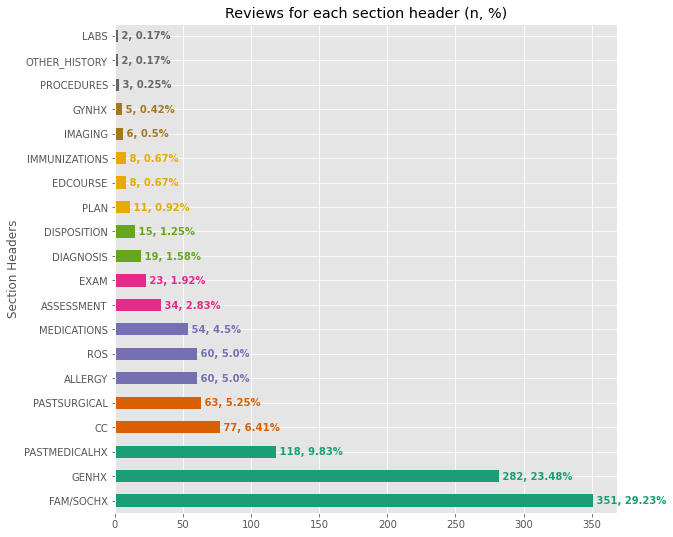

In [7]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
colors = plt.cm.Dark2(np.linspace(0, 1, num_classes))
iter_color = iter(colors)

trainingdataset['section_header'].value_counts().plot.barh(title="Reviews for each section header (n, %)", 
                                                 ylabel="Section Headers",
                                                 color=colors,
                                                 figsize=(9,9))

for i, v in enumerate(trainingdataset['section_header'].value_counts()):
  c = next(iter_color)
  plt.text(v, i,
           " "+str(v)+", "+str(round(v*100/trainingdataset.shape[0],2))+"%", 
           color=c, 
           va='center', 
           fontweight='bold')

In [8]:
possible_labels = trainingdataset.section_header.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
label_dict

{'GENHX': 0,
 'MEDICATIONS': 1,
 'CC': 2,
 'PASTMEDICALHX': 3,
 'ALLERGY': 4,
 'FAM/SOCHX': 5,
 'PASTSURGICAL': 6,
 'OTHER_HISTORY': 7,
 'ASSESSMENT': 8,
 'ROS': 9,
 'DISPOSITION': 10,
 'EXAM': 11,
 'PLAN': 12,
 'DIAGNOSIS': 13,
 'EDCOURSE': 14,
 'IMMUNIZATIONS': 15,
 'LABS': 16,
 'IMAGING': 17,
 'PROCEDURES': 18,
 'GYNHX': 19}

In [9]:
trainingdataset['label'] = trainingdataset.section_header.map(label_dict)


# Dropping the section_header column
trainingdataset = trainingdataset.drop('section_header', axis=1)
trainingdataset = trainingdataset.drop('ID', axis=1)
trainingdataset.head()

dialogue  label
0  What brings back clinic today, miss? I came re...      0
1  How're feeling today? Terrible. I'm worst head...      0
2  Hello, miss. What reason visit today? I think ...      0
3  Are taking counter medicines? No, ones prescri...      1
4  Hi, you? I burned hand. Oh, I sorry. Wow! Yeah...      2

In [10]:
# Doing the same for validation dataset
validationdataset['label'] = validationdataset.section_header.map(label_dict)
validationdataset = validationdataset.drop('section_header', axis=1)
validationdataset = validationdataset.drop('ID', axis=1)
validationdataset.head()

dialogue  label
0  When pain begin? I've low back pain eight year...      0
1  Hey, bud. What brings today? A rash upper arms...      9
2  Has anything changed medical history since las...      3
3  How've treating acne? The dermatologist starte...      1
4  Have experiencing mental difficulties confusio...      2

In [11]:
#!pip install scikit-learn
# !pip install --upgrade numpy==1.23.3
# !pip install --upgrade scikit-learn
# !/sw/pkgs/arc/python/3.10.4/bin/python3.10 -m pip install --upgrade pip

In [12]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

y = tf.keras.utils.to_categorical(trainingdataset['label'].values, num_classes=num_classes)

x_train = trainingdataset['dialogue']
y_train = tf.keras.utils.to_categorical(trainingdataset['label'].values, num_classes=num_classes)
x_valid = validationdataset['dialogue']
y_valid = tf.keras.utils.to_categorical(validationdataset['label'].values, num_classes=num_classes)
# x_train, x_test, y_train, y_test = train_test_split(trainingdataset['dialogue'], y, test_size=0.25)

2023-04-23 16:27:03.576745: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-23 16:27:16.005469: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-23 16:27:16.007922: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-23 16:27:24.315180: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [13]:
!pip install tensorflow_text

Defaulting to user installation because normal site-packages is not writeable


In [14]:
!pip install tensorflow_hub

Defaulting to user installation because normal site-packages is not writeable


In [15]:
import tensorflow_hub as hub
import tensorflow_text as text
preprocessor = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder-cmlm/multilingual-preprocess/2")
encoder = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder-cmlm/multilingual-base/1")

2023-04-23 16:27:45.151412: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'seq_length' with dtype int32
	 [[{{node seq_length}}]]
2023-04-23 16:27:45.152027: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'seq_length' with dtype int32
	 [[{{node seq_length}}]]
2023-04-23 16:27:45.152149: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'seq_length' with dtype int32
	 [[{{node seq_length}}]]
2023-04-23 16:27:45.152701: I tensorflow/core/

In [16]:
def get_embeddings(sentences):
  '''return BERT-like embeddings of input text
  Args:
    - sentences: list of strings
  Output:
    - BERT-like embeddings: tf.Tensor of shape=(len(sentences), 768)
  '''
  preprocessed_text = preprocessor(sentences)
  return encoder(preprocessed_text)['pooled_output']


get_embeddings(["Doctor: What brings you back into the clinic today, miss? Patient: I came in for a refill of my blood pressure medicine. Doctor: It looks like Doctor Kumar followed up with you last time regarding your hypertension, osteoarthritis, osteoporosis, hypothyroidism, allergic rhinitis and kidney stones.  Have you noticed any changes or do you have any concerns regarding these issues?  Patient: No. Doctor: Have you had any fever or chills, cough, congestion, nausea, vomiting, chest pain, chest pressure?Patient: No.  Doctor: Great. Also, for our records, how old are you and what race do you identify yourself as?Patient: I am seventy six years old and identify as a white female."])

<tf.Tensor: shape=(1, 768), dtype=float32, numpy=
array([[-4.03506607e-01, -1.97756886e-01, -4.55542326e-01,
         2.25445807e-01, -4.02145416e-01,  4.41778125e-03,
        -3.94332796e-01, -2.87559241e-01, -3.77524555e-01,
        -1.31582111e-01, -5.89674473e-01, -4.79792953e-01,
        -1.24116950e-01, -9.47783738e-02, -6.55714452e-01,
        -6.46416664e-01,  2.66260177e-01,  1.15928389e-01,
        -3.87147963e-01, -7.45687727e-03, -3.30835134e-01,
        -1.20040283e-01, -3.25665474e-01,  2.09874347e-01,
        -2.48006523e-01, -8.75196815e-01,  5.79429090e-01,
        -9.06287655e-02, -1.06104404e-01, -5.92461050e-01,
        -3.46665144e-01, -3.70200515e-01, -2.84532487e-01,
        -5.40591002e-01,  3.40254009e-01,  2.61205524e-01,
        -3.90656769e-01, -1.98807448e-01,  3.00397217e-01,
         1.75932199e-01, -1.00948429e-03, -1.64399385e-01,
        -1.76762640e-01,  1.39788017e-01,  1.01407930e-01,
         3.32827121e-02,  5.14182508e-01,  1.75705239e-01,
      

In [17]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [18]:
# Observe semantic textual similarities
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity


def plot_similarity(features, labels):
  """Plot a similarity matrix of the embeddings."""
  cos_sim = cosine_similarity(features)
  fig = plt.figure(figsize=(10,8))
  sns.set(font_scale=1.2)
  cbar_kws=dict(use_gridspec=False, location="left")
  g = sns.heatmap(
      cos_sim, xticklabels=labels, yticklabels=labels,
      vmin=0, vmax=1, annot=True, cmap="Blues", 
      cbar_kws=cbar_kws)
  g.tick_params(labelright=True, labelleft=False)
  g.set_yticklabels(labels, rotation=0)
  g.set_title("Semantic Textual Similarity")

In [19]:
# Plotting similary between two section_headers dialogues (GENHX & Medication History) WITHOUT REMOVAL OF DOCTOR PATIENT TAGS
x = "Doctor: How're you feeling today?  Patient: Terrible. I'm having the worst headache of my life. Doctor: I'm so sorry. Well you are only twenty five, so let's hope this is the last of the worst. Let's see how we can best help you. When did it start? Patient: Around eleven in the morning. Doctor: Today? Patient: Um no yesterday. July thirty first. Doctor: July thirty first O eight. Got it. Did it come on suddenly? Patient: Yeah. Doctor: Are you having any symptoms with it, such as blurry vision, light sensitivity, dizziness, lightheadedness, or nausea? Patient: I'm having blurry vision and lightheadedness.  I also can't seem to write well. It looks so messy. I am naturally right handed but my writing looks like I am trying with my left. Doctor: How would you describe the lightheadedness? Patient: Like there are blind spots. Doctor: Okay. How about any vomiting? Patient: Um no. I feel like my face is pretty swollen though. I don't know if it's related to the headache but it started around the same time. Doctor: Here in the E R, we'll do a thorough exam and eval to make sure nothing serious is going on. While we're waiting for your C T results, I'm going to order a migraine cocktail and some Morphine. Patient: Thank. Will the nurse be in soon? Doctor: Yes, she'll be right in as soon as the order is placed. It shouldn't be more than a few minutes. If it takes longer, then please ring the call bell."
y = "Doctor: Is he currently taking any medication? Guest_family: No."
sentence = [x,y]

plot_similarity(get_embeddings(sentence), sentence)


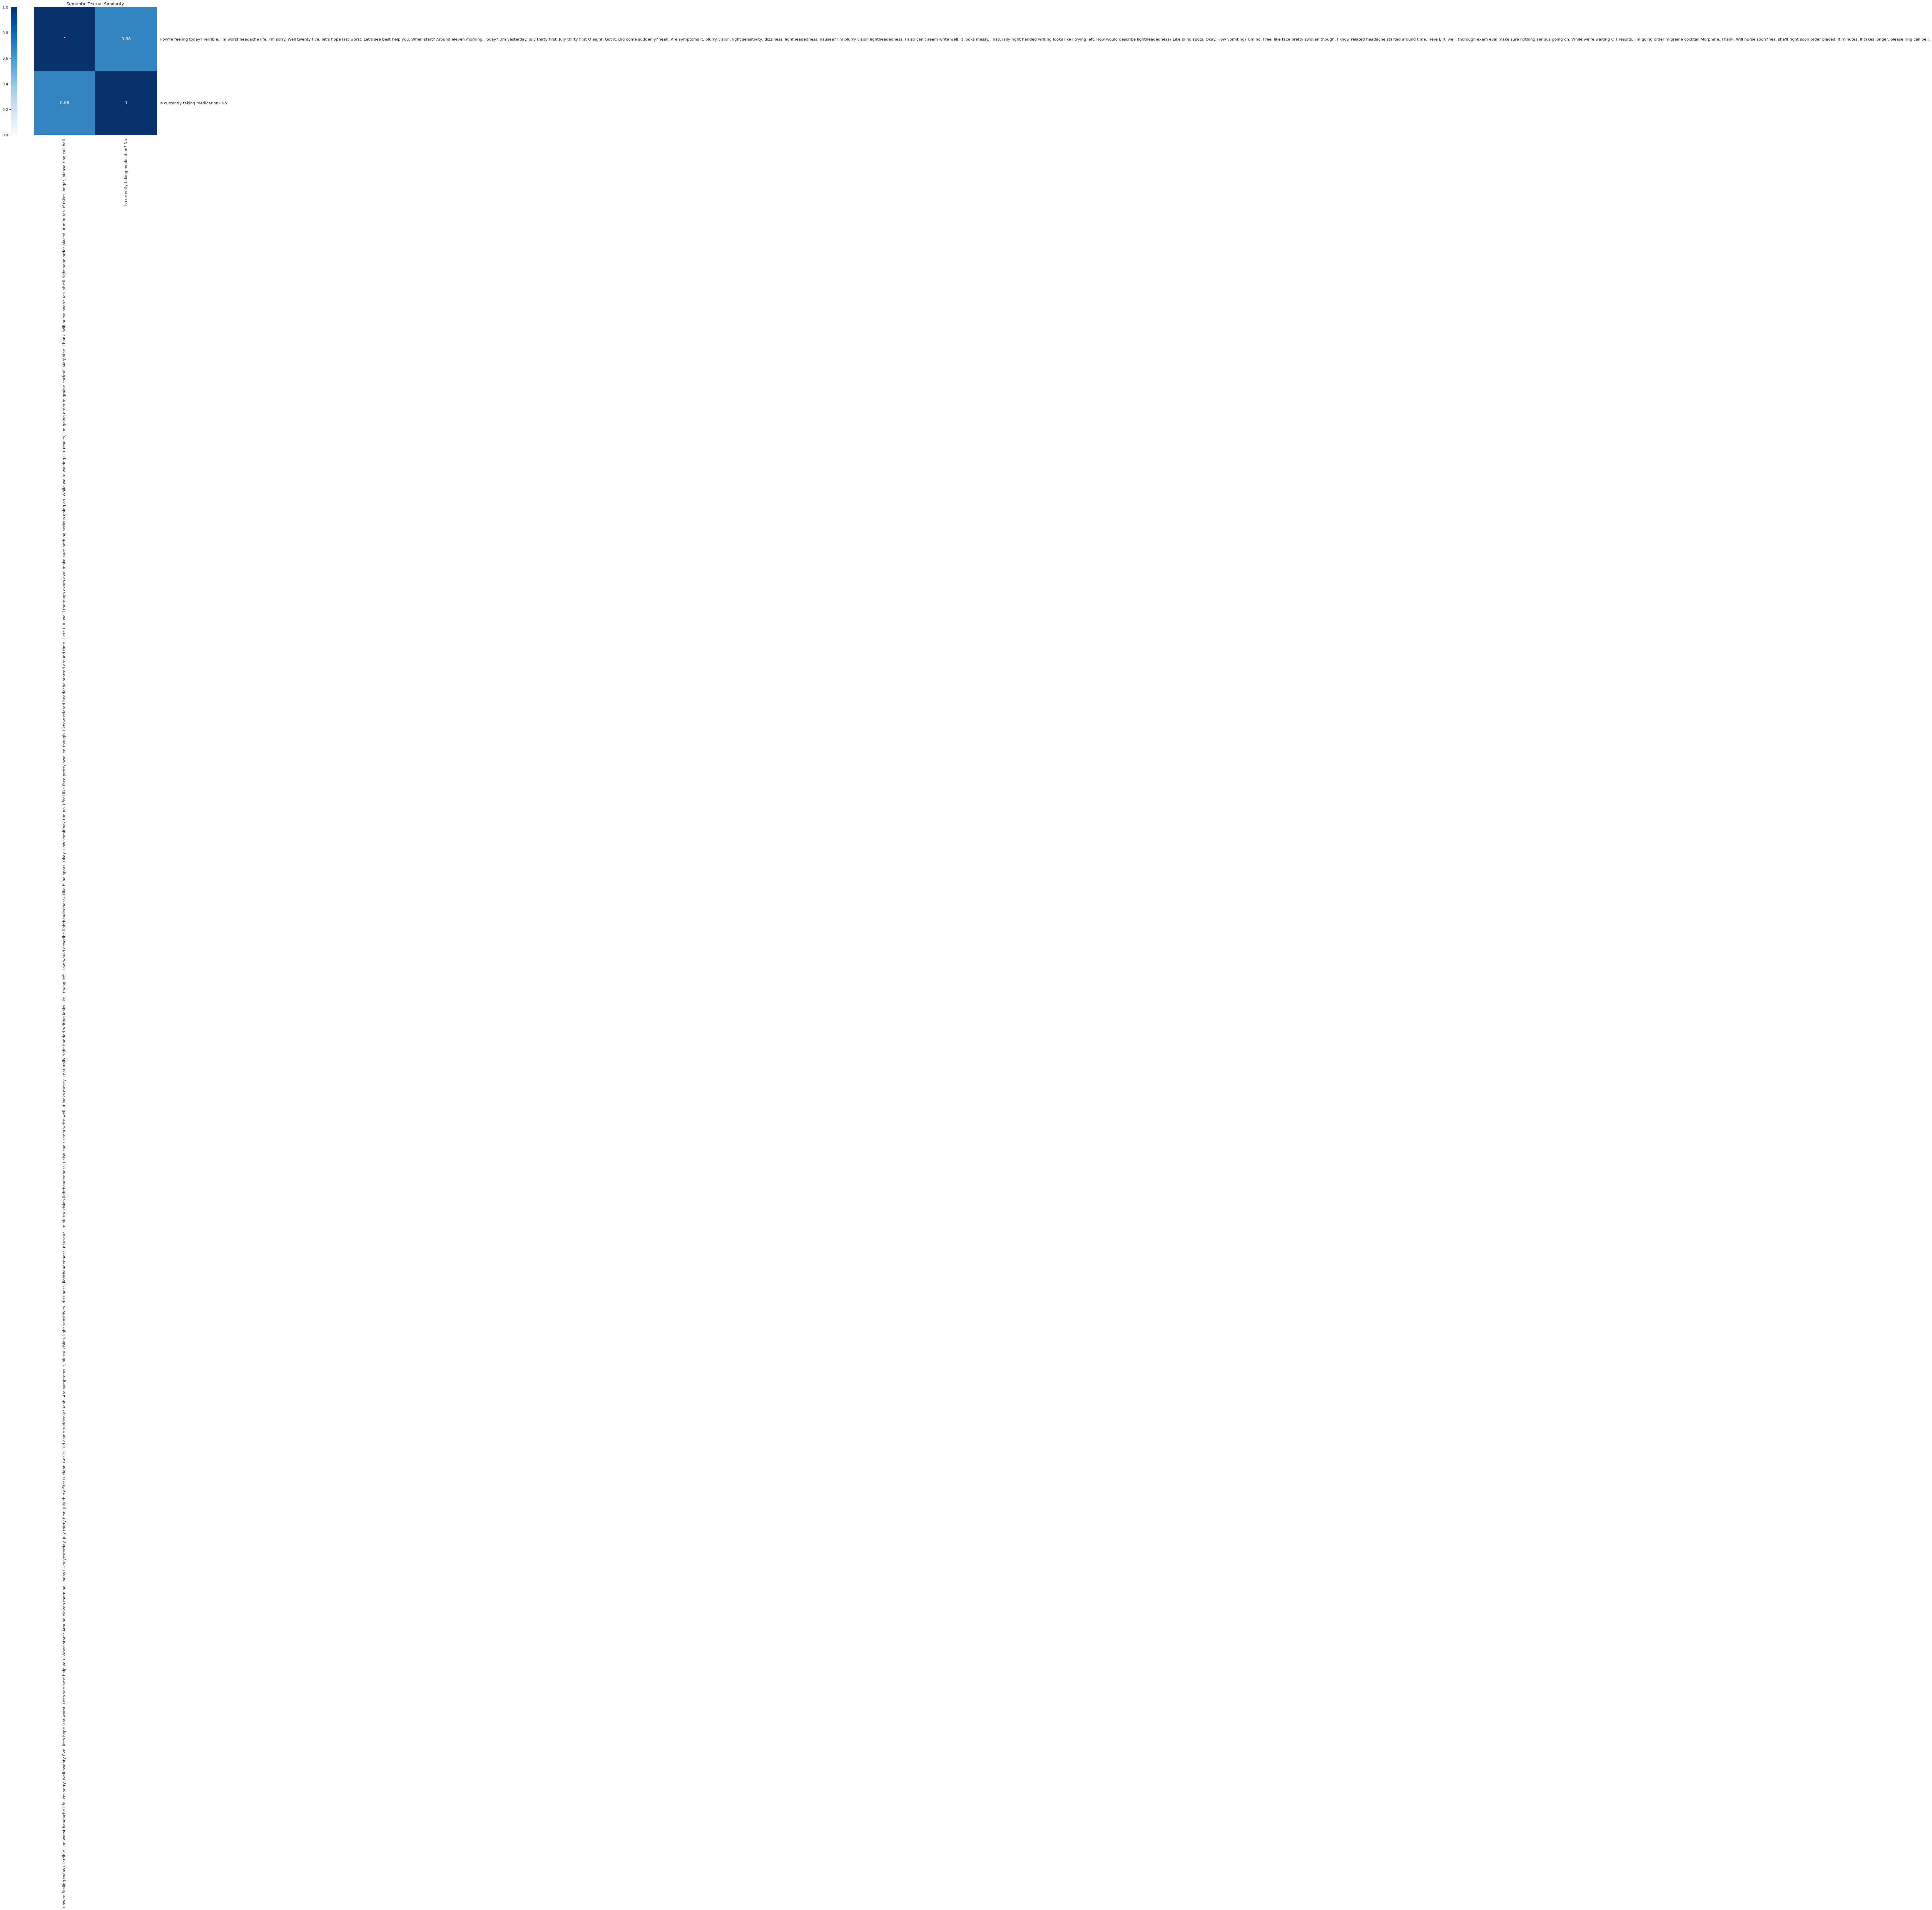

In [20]:
# Plotting similary between two section_headers dialogues (GENHX & Medication) AFTER REMOVAL OF TAGS AND STOP WORDS
x = "How're feeling today? Terrible. I'm worst headache life. I'm sorry. Well twenty five, let's hope last worst. Let's see best help you. When start? Around eleven morning. Today? Um yesterday. July thirty first. July thirty first O eight. Got it. Did come suddenly? Yeah. Are symptoms it, blurry vision, light sensitivity, dizziness, lightheadedness, nausea? I'm blurry vision lightheadedness. I also can't seem write well. It looks messy. I naturally right handed writing looks like I trying left. How would describe lightheadedness? Like blind spots. Okay. How vomiting? Um no. I feel like face pretty swollen though. I know related headache started around time. Here E R, we'll thorough exam eval make sure nothing serious going on. While we're waiting C T results, I'm going order migraine cocktail Morphine. Thank. Will nurse soon? Yes, she'll right soon order placed. It minutes. If takes longer, please ring call bell."
y = "Is currently taking medication? No."
sentence = [x,y]

plot_similarity(get_embeddings(sentence), sentence)

In [21]:
from keras import backend as K

def balanced_recall(y_true, y_pred):
    """This function calculates the balanced recall metric
    recall = TP / (TP + FN)
    """
    recall_by_class = 0
    # iterate over each predicted class to get class-specific metric
    for i in range(y_pred.shape[1]):
        y_pred_class = y_pred[:, i]
        y_true_class = y_true[:, i]
        true_positives = K.sum(K.round(K.clip(y_true_class * y_pred_class, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true_class, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        recall_by_class = recall_by_class + recall
    return recall_by_class / y_pred.shape[1]

def balanced_precision(y_true, y_pred):
    """This function calculates the balanced precision metric
    precision = TP / (TP + FP)
    """
    precision_by_class = 0
    # iterate over each predicted class to get class-specific metric
    for i in range(y_pred.shape[1]):
        y_pred_class = y_pred[:, i]
        y_true_class = y_true[:, i]
        true_positives = K.sum(K.round(K.clip(y_true_class * y_pred_class, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred_class, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        precision_by_class = precision_by_class + precision
    # return average balanced metric for each class
    return precision_by_class / y_pred.shape[1]

def balanced_f1_score(y_true, y_pred):
    """This function calculates the F1 score metric"""
    precision = balanced_precision(y_true, y_pred)
    recall = balanced_recall(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

In [22]:
i = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
x = preprocessor(i)
x = encoder(x)
x = tf.keras.layers.Dropout(0.2, name="dropout")(x['pooled_output'])
x = tf.keras.layers.Dense(num_classes, activation='softmax', name="output")(x)

model = tf.keras.Model(i, x)

2023-04-23 16:28:26.799223: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype string and shape [?]
	 [[{{node inputs}}]]
2023-04-23 16:28:26.817757: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder' with dtype string and shape [?]
	 [[{{node Placeholder}}]]
2023-04-23 16:28:26.944525: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype int32 and shape [?,128]
	 [[{{node inputs}}]]
2023-04-23 1

In [23]:
# n_epochs = 20

# METRICS = [
#       tf.keras.metrics.CategoricalAccuracy(name="accuracy"),
#       balanced_recall,
#       balanced_precision,
#       balanced_f1_score
# ]

# earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", 
#                                                       patience = 3,
#                                                       restore_best_weights = True)

# model.compile(optimizer = "adam",
#               loss = "categorical_crossentropy",
#               metrics = METRICS)

# model_fit = model.fit(x_train, 
#                       y_train, 
#                       epochs = n_epochs,
#                       validation_data = (x_valid, y_valid),
#                       callbacks = [earlystop_callback])

In [24]:
# !pip install seaborn

In [25]:
# Observe semantic textual similarities
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity


def plot_similarity(features, labels):
  """Plot a similarity matrix of the embeddings."""
  cos_sim = cosine_similarity(features)
  fig = plt.figure(figsize=(10,8))
  sns.set(font_scale=1.2)
  cbar_kws=dict(use_gridspec=False, location="left")
  g = sns.heatmap(
      cos_sim, xticklabels=labels, yticklabels=labels,
      vmin=0, vmax=1, annot=True, cmap="Blues", 
      cbar_kws=cbar_kws)
  g.tick_params(labelright=True, labelleft=False)
  g.set_yticklabels(labels, rotation=0)
  g.set_title("Semantic Textual Similarity")

In [26]:
# Plotting similary between two section_headers dialogues (GENHX & Medication History) WITHOUT REMOVAL OF DOCTOR PATIENT TAGS
# x = "Doctor: How're you feeling today?  Patient: Terrible. I'm having the worst headache of my life. Doctor: I'm so sorry. Well you are only twenty five, so let's hope this is the last of the worst. Let's see how we can best help you. When did it start? Patient: Around eleven in the morning. Doctor: Today? Patient: Um no yesterday. July thirty first. Doctor: July thirty first O eight. Got it. Did it come on suddenly? Patient: Yeah. Doctor: Are you having any symptoms with it, such as blurry vision, light sensitivity, dizziness, lightheadedness, or nausea? Patient: I'm having blurry vision and lightheadedness.  I also can't seem to write well. It looks so messy. I am naturally right handed but my writing looks like I am trying with my left. Doctor: How would you describe the lightheadedness? Patient: Like there are blind spots. Doctor: Okay. How about any vomiting? Patient: Um no. I feel like my face is pretty swollen though. I don't know if it's related to the headache but it started around the same time. Doctor: Here in the E R, we'll do a thorough exam and eval to make sure nothing serious is going on. While we're waiting for your C T results, I'm going to order a migraine cocktail and some Morphine. Patient: Thank. Will the nurse be in soon? Doctor: Yes, she'll be right in as soon as the order is placed. It shouldn't be more than a few minutes. If it takes longer, then please ring the call bell."
# y = "Doctor: Is he currently taking any medication? Guest_family: No."
# sentence = [x,y]

# plot_similarity(get_embeddings(sentence), sentence)


In [27]:
# Plotting similary between two section_headers dialogues (GENHX & Medication) AFTER REMOVAL OF TAGS AND STOP WORDS
# x = "How're feeling today? Terrible. I'm worst headache life. I'm sorry. Well twenty five, let's hope last worst. Let's see best help you. When start? Around eleven morning. Today? Um yesterday. July thirty first. July thirty first O eight. Got it. Did come suddenly? Yeah. Are symptoms it, blurry vision, light sensitivity, dizziness, lightheadedness, nausea? I'm blurry vision lightheadedness. I also can't seem write well. It looks messy. I naturally right handed writing looks like I trying left. How would describe lightheadedness? Like blind spots. Okay. How vomiting? Um no. I feel like face pretty swollen though. I know related headache started around time. Here E R, we'll thorough exam eval make sure nothing serious going on. While we're waiting C T results, I'm going order migraine cocktail Morphine. Thank. Will nurse soon? Yes, she'll right soon order placed. It minutes. If takes longer, please ring call bell."
# y = "Is currently taking medication? No."
# sentence = [x,y]

# plot_similarity(get_embeddings(sentence), sentence)

In [28]:
from keras import backend as K

def balanced_recall(y_true, y_pred):
    """This function calculates the balanced recall metric
    recall = TP / (TP + FN)
    """
    recall_by_class = 0
    # iterate over each predicted class to get class-specific metric
    for i in range(y_pred.shape[1]):
        y_pred_class = y_pred[:, i]
        y_true_class = y_true[:, i]
        true_positives = K.sum(K.round(K.clip(y_true_class * y_pred_class, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true_class, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        recall_by_class = recall_by_class + recall
    return recall_by_class / y_pred.shape[1]

def balanced_precision(y_true, y_pred):
    """This function calculates the balanced precision metric
    precision = TP / (TP + FP)
    """
    precision_by_class = 0
    # iterate over each predicted class to get class-specific metric
    for i in range(y_pred.shape[1]):
        y_pred_class = y_pred[:, i]
        y_true_class = y_true[:, i]
        true_positives = K.sum(K.round(K.clip(y_true_class * y_pred_class, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred_class, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        precision_by_class = precision_by_class + precision
    # return average balanced metric for each class
    return precision_by_class / y_pred.shape[1]

def balanced_f1_score(y_true, y_pred):
    """This function calculates the F1 score metric"""
    precision = balanced_precision(y_true, y_pred)
    recall = balanced_recall(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

In [29]:
i = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
x = preprocessor(i)
x = encoder(x)
x = tf.keras.layers.Dropout(0.2, name="dropout")(x['pooled_output'])
x = tf.keras.layers.Dense(num_classes, activation='softmax', name="output")(x)

model = tf.keras.Model(i, x)

2023-04-23 16:28:27.174833: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder' with dtype string and shape [?]
	 [[{{node Placeholder}}]]
2023-04-23 16:28:27.246793: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder_1' with dtype int32 and shape [?,128]
	 [[{{node Placeholder_1}}]]
2023-04-23 16:28:27.246892: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder_2' with dtype int32 and shape [?,128]
	 [[{{node

In [30]:
n_epochs = 21

METRICS = [
      tf.keras.metrics.CategoricalAccuracy(name="accuracy"),
      balanced_recall,
      balanced_precision,
      balanced_f1_score
]

earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", 
                                                      patience = 3,
                                                      restore_best_weights = True)

model.compile(optimizer = "adam",
              loss = "categorical_crossentropy",
              metrics = METRICS)

model_fit = model.fit(x_train, 
                      y_train, 
                      epochs = n_epochs,
                      validation_data = (x_valid, y_valid),
                      callbacks = [earlystop_callback])

Epoch 1/21


2023-04-23 16:28:27.838696: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/lambda_8/PartitionedCall_grad/lambda_8/PartitionedCall' with dtype float and shape [?,768]
	 [[{{node gradients/lambda_8/PartitionedCall_grad/lambda_8/PartitionedCall}}]]
2023-04-23 16:28:27.838785: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/lambda_8/PartitionedCall_grad/lambda_8/PartitionedCall_1' with dtype float and shape [?,1]
	 [[{{node gradients/lambda_8/PartitionedCall_grad/lambda_8/PartitionedCall_1}}]]
2023-04-23 16:28:27.838831: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Ex

38/38 [==============================] - 109s 3s/step - loss: 2.2515 - accuracy: 0.3172 - balanced_recall: 0.0111 - balanced_precision: 0.0253 - balanced_f1_score: 0.0138 - val_loss: 2.2346 - val_accuracy: 0.3900 - val_balanced_recall: 0.0100 - val_balanced_precision: 0.0437 - val_balanced_f1_score: 0.0161
Epoch 2/21
38/38 [==============================] - 87s 2s/step - loss: 1.6818 - accuracy: 0.5121 - balanced_recall: 0.0351 - balanced_precision: 0.0842 - balanced_f1_score: 0.0476 - val_loss: 1.9389 - val_accuracy: 0.4900 - val_balanced_recall: 0.0504 - val_balanced_precision: 0.0732 - val_balanced_f1_score: 0.0575
Epoch 3/21
38/38 [==============================] - 87s 2s/step - loss: 1.4233 - accuracy: 0.6053 - balanced_recall: 0.0780 - balanced_precision: 0.1178 - balanced_f1_score: 0.0924 - val_loss: 1.7555 - val_accuracy: 0.5800 - val_balanced_recall: 0.0561 - val_balanced_precision: 0.0872 - val_balanced_f1_score: 0.0672
Epoch 4/21
38/38 [==============================] - 88s 

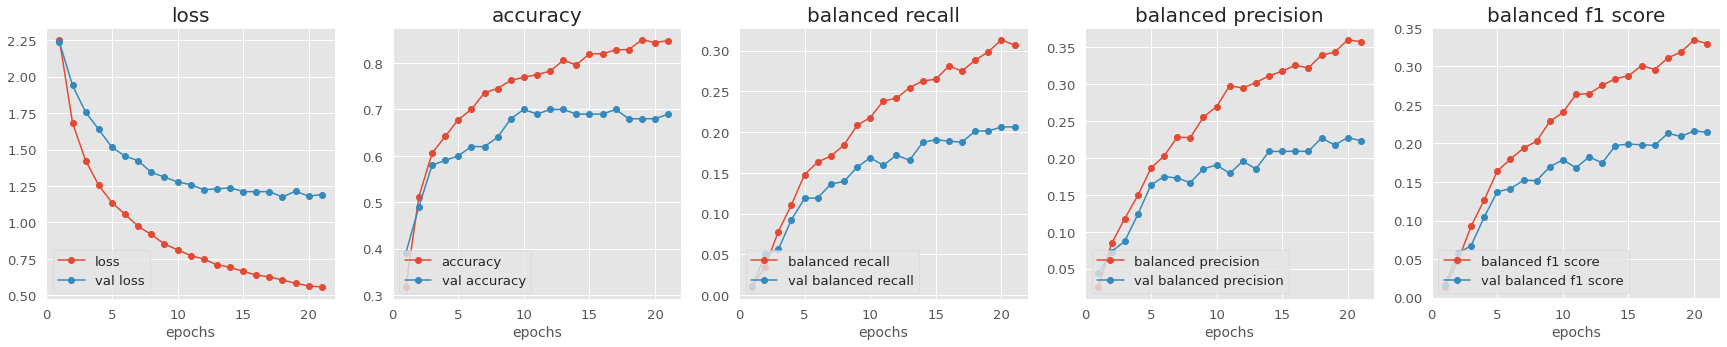

In [44]:

x = list(range(1, n_epochs+1))
metric_list = list(model_fit.history.keys())
num_metrics = int(len(metric_list)/2)

fig, ax = plt.subplots(nrows=1, ncols=num_metrics, figsize=(30, 5))

for i in range(0, num_metrics):
  ax[i].plot(x, model_fit.history[metric_list[i]], marker="o", label=metric_list[i].replace("_", " "))
  ax[i].plot(x, model_fit.history[metric_list[i+num_metrics]], marker="o", label=metric_list[i+num_metrics].replace("_", " "))
  ax[i].set_xlabel("epochs",fontsize=14)
  ax[i].set_title(metric_list[i].replace("_", " "),fontsize=20)
  ax[i].legend(loc="lower left")

In [45]:
def predict_class(reviews):
  '''predict class of input text
  Args:
    - reviews (list of strings)
  Output:
    - class (list of int)
  '''
  return [np.argmax(pred) for pred in model.predict(sentence)]


predict_class(sentence)

1/1 [==============================] - 1s 871ms/step


[0, 5]

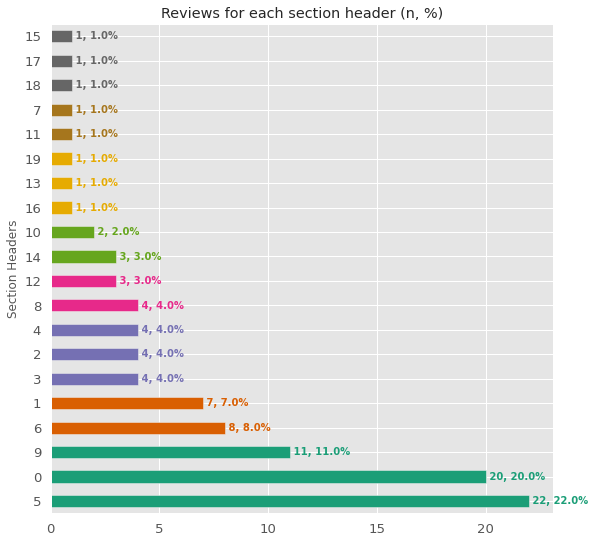

In [33]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
colors = plt.cm.Dark2(np.linspace(0, 1, num_classes))
iter_color = iter(colors)

validationdataset['label'].value_counts().plot.barh(title="Reviews for each section header (n, %)", 
                                                 ylabel="Section Headers",
                                                 color=colors,
                                                 figsize=(9,9))

for i, v in enumerate(validationdataset['label'].value_counts()):
  c = next(iter_color)
  plt.text(v, i,
           " "+str(v)+", "+str(round(v*100/validationdataset.shape[0],2))+"%", 
           color=c, 
           va='center', 
           fontweight='bold')

In [34]:
list_of_strings = validationdataset['dialogue'].astype(str).tolist()
type(list_of_strings[2])

str

In [35]:
y_pred = model.predict(list_of_strings)
y_pred = np.round(y_pred, 2)

y_pred

4/4 [==============================] - 7s 1s/step


array([[0.84, 0.  , 0.04, ..., 0.  , 0.  , 0.  ],
       [0.8 , 0.  , 0.12, ..., 0.  , 0.  , 0.  ],
       [0.62, 0.02, 0.06, ..., 0.01, 0.  , 0.01],
       ...,
       [0.16, 0.01, 0.19, ..., 0.03, 0.  , 0.  ],
       [0.  , 0.02, 0.01, ..., 0.01, 0.  , 0.  ],
       [0.39, 0.11, 0.1 , ..., 0.02, 0.  , 0.  ]], dtype=float32)

In [36]:
y_pred_new = []
pred_label = 0
for x in y_pred:
    sample = x[1]
    for i in range(len(x)):
        if x[i]>=sample:
            sample = x[i]
            pred_label = i
    y_pred_new.append(pred_label)
print(len(y_pred_new))

100


In [37]:
print(len(y_pred[0]))
print(len(y_pred))

20
100


In [38]:
validationdataset['label'].head()

0    0
1    9
2    3
3    1
4    2
Name: label, dtype: int64

In [39]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(validationdataset['label'].values, y_pred_new)
print(mse)

22.12


In [46]:
from sklearn.metrics import classification_report

# assuming there are 2 classes
# target_names = ['class 0', 'class 1']

# generate classification report
print(classification_report(validationdataset['label'].values, y_pred_new, target_names=label_dict.keys()))


               precision    recall  f1-score   support

        GENHX       0.62      0.90      0.73        20
  MEDICATIONS       0.75      0.86      0.80         7
           CC       0.43      0.75      0.55         4
PASTMEDICALHX       0.50      0.50      0.50         4
      ALLERGY       0.67      0.50      0.57         4
    FAM/SOCHX       0.78      0.95      0.86        22
 PASTSURGICAL       1.00      1.00      1.00         8
OTHER_HISTORY       0.00      0.00      0.00         1
   ASSESSMENT       0.00      0.00      0.00         4
          ROS       0.86      0.55      0.67        11
  DISPOSITION       0.00      0.00      0.00         2
         EXAM       1.00      1.00      1.00         1
         PLAN       0.00      0.00      0.00         3
    DIAGNOSIS       0.00      0.00      0.00         1
     EDCOURSE       0.00      0.00      0.00         3
IMMUNIZATIONS       1.00      1.00      1.00         1
         LABS       0.00      0.00      0.00         1
      IMA

/home/iamsk/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/iamsk/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/iamsk/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(validationdataset['label'], y_pred_new)
print(accuracy)

0.68


https://github.com/yelyzaveta-yaroshchuk/multi-label-classification-dnn/blob/main/An%20irrigation%20machine.ipynb

In [47]:
# Set a random seed
np.random.seed(1)
# Return a new model with the given activation
def get_model(act_function):
#     model = Sequential()
#     model.add(Dense(4, input_shape=(20,), activation=act_function))
#     model.add(Dense(3, activation='relu'))
#     model.compile(optimizer='adam',
#            loss = 'binary_crossentropy',
#            metrics=['accuracy'])
#     return model
    i = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
    x = preprocessor(i)
    x = encoder(x)
    x = tf.keras.layers.Dropout(0.2, name="dropout")(x['pooled_output'])
    x = tf.keras.layers.Dense(num_classes, activation=act_function, name="output")(x)

    model = tf.keras.Model(i, x)
    METRICS = [
      tf.keras.metrics.CategoricalAccuracy(name="accuracy"),
      balanced_recall,
      balanced_precision,
      balanced_f1_score
    ]

    earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", 
                                                          patience = 3,
                                                          restore_best_weights = True)

    model.compile(optimizer = "adam",
                  loss = "categorical_crossentropy",
                  metrics = METRICS)
    return model

In [ ]:
from keras.models import Sequential
from keras.layers import Activation, Dense
# Activation functions to try
activations = ['relu','gelu', 'elu', 'softmax']

# Loop over the activation functions
activation_results = {}

for act in activations:
  # Get a new model with the current activation
  model = get_model(act)

  # Fit the model and store the history results
  h_callback = model.fit(x_train, y_train, validation_data = (x_valid, y_valid), epochs = 21, verbose= 0)
  activation_results[act] = h_callback

2023-04-23 17:08:39.139551: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder' with dtype string and shape [?]
	 [[{{node Placeholder}}]]
2023-04-23 17:08:39.235937: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder_1' with dtype int32 and shape [?,128]
	 [[{{node Placeholder_1}}]]
2023-04-23 17:08:39.236036: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder_2' with dtype int32 and shape [?,128]
	 [[{{node

In [50]:
# Extract val_loss history of each activation function
val_loss_per_function = {k:v.history['val_loss'] for k,v in activation_results.items()}

# Turn the dictionary into a pandas dataframe
val_loss_curves = pd.DataFrame(val_loss_per_function)
# Plot the curves
# val_loss_curves.plot(title='Loss per Activation function')

In [51]:
val_acc_per_function = {k:v.history['val_accuracy'] for k,v in activation_results.items()}
# Turn the dictionary into a pandas dataframe
val_acc_curves = pd.DataFrame(val_acc_per_function)
# Plot the curves
# val_acc_curves.plot(title='Accuracy per Activation function')

In [52]:
# Create a dataframe from val_loss_per_function
val_loss= pd.DataFrame(val_loss_per_function)

# Call plot on the dataframe
val_loss.plot(title='Loss per Activation function')
plt.show()

# Create a dataframe from val_acc_per_function
val_acc = pd.DataFrame(val_acc_per_function)

# Call plot on the dataframe
val_acc.plot(title='Accuracy per Activation function')
plt.show()

TypeError: no numeric data to plot